## Terry Stops


#### What is it?

The purpose of a Terry stop is to conduct a brief investigation to confirm or deny that the suspect is involved in criminal activity. A law enforcement officer may initiate a Terry stop when he or she suspects that an individual is committing, has committed, or is about to commit a crime but probable cause does not yet exist to arrest and the officer wants to “stop” the suspect and investigate.If, during the stop, probable cause to arrest is developed, the suspect will be arrested.


### Business Problem

As More prominant bias appears across america in police precincts what are the odds of you getting stopped and is it really beneficial towards the city of seattle? What would make the stop benificial is if the stops results in arrest due to the reasonable suspicion but 


####
The results of stops are more Justified arrests VS arrests not being justified and just being a product of racial bias

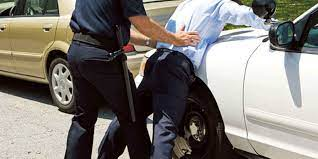

In [1]:
terry = pd.read_csv('terry_Oct_2022.csv')
import pandas as pd 
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score
from matplotlib import pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.metrics import plot_confusion_matrix
from datetime import datetime as dt
from sklearn.compose import make_column_transformer
from sklearn.metrics import plot_confusion_matrix, accuracy_score, recall_score, f1_score, precision_score,\
    classification_report, roc_auc_score
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier
from sklearn.compose import ColumnTransformer
from sklearn.neighbors import KNeighborsClassifier, NearestNeighbors
from sklearn.model_selection import train_test_split, KFold, GridSearchCV


You should consider upgrading via the 'C:\Users\metropolitanparkapts\AppData\Local\Programs\Python\Python310\python.exe -m pip install --upgrade pip' command.


## Data Understanding - Exploration


##### Column Name	Description	Type
Subject Age Group	
Subject Age Group (10 year increments) as reported by the officer.

Subject ID	-- Removing (to broad) 
Key, generated daily, identifying unique subjects in the dataset using a character to character match of first name and last name. "Null" values indicate an "anonymous" or "unidentified" subject. Subjects of a Terry Stop are not required to present identification.

GO / SC Num	
General Offense or Street Check number, relating the Terry Stop to the parent report. This field may have a one to many relationship in the data.


Terry Stop ID	
Key identifying unique Terry Stop reports.

Stop Resolution	
Resolution of the stop as reported by the officer.

Weapon Type	
Type of weapon, if any, identified during a search or frisk of the subject. Indicates "None" if no weapons was found.

Officer ID	
Key identifying unique officers in the dataset.

Officer YOB	
Year of birth, as reported by the officer.

Officer Gender	
Gender of the officer, as reported by the officer.

Officer Race	
Race of the officer, as reported by the officer.

Subject Perceived Race	
Perceived race of the subject, as reported by the officer.

Subject Perceived Gender	
Perceived gender of the subject, as reported by the officer.

Reported Date	
Date the report was filed in the Records Management System (RMS). Not necessarily the date the stop occurred but generally within 1 day.

Date & Time

Reported Time	
Time the stop was reported in the Records Management System (RMS). Not the time the stop occurred but generally within 10 hours.


Initial Call Type (Removing)
Initial classification of the call as assigned by 911.

Final Call Type(Removing)
Final classification of the call as assigned by the primary officer closing the event.

Call Type(Removing)
How the call was received by the communication center.

Officer Squad(Removing Due to nulls)
Functional squad assignment (not budget) of the officer as reported by the Data Analytics Platform (DAP).

Arrest Flag(Target Variable We want to see if an arrest was made
Indicator of whether a "physical arrest" was made, of the subject, during the Terry Stop. Does not necessarily reflect a report of an arrest in the Records Management System (RMS).

Frisk Flag	
Indicator of whether a "frisk" was conducted, by the officer, of the subject, during the Terry Stop.

Precinct	
Precinct of the address associated with the underlying Computer Aided Dispatch (CAD) event. Not necessarily where the Terry Stop occurred.

Sector	
Sector of the address associated with the underlying Computer Aided Dispatch (CAD) event. Not necessarily where the Terry Stop occurred.

Beat	
Beat of the address associated with the underlying Computer Aided Dispatch (CAD) event. Not necessarily where the Terry Stop occurred.



In [2]:
terry

,Subject Age Group,Subject ID,GO / SC Num,Terry Stop ID,Stop Resolution,Weapon Type,Officer ID,Officer YOB,Officer Gender,Officer Race,...,Reported Time,Initial Call Type,Final Call Type,Call Type,Officer Squad,Arrest Flag,Frisk Flag,Precinct,Sector,Beat
0,-,-8,20220000063036,32023419019,Field Contact,-,6805,1973,M,White,...,09:34:02.0000000,SUSPICIOUS STOP - OFFICER INITIATED ONVIEW,--SUSPICIOUS CIRCUM. - SUSPICIOUS PERSON,ONVIEW,WEST PCT 1ST W - KQ/DM RELIEF,N,Y,West,K,K3
1,-,-8,20220000233868,35877423282,Field Contact,-,8881,1988,M,Asian,...,19:20:16.0000000,THREATS (INCLS IN-PERSON/BY PHONE/IN WRITING),--DISTURBANCE - OTHER,911,TRAINING - FIELD TRAINING SQUAD,N,Y,South,O,O1
2,-,-1,20140000120677,92317,Arrest,None,7500,1984,M,Black or African American,...,11:32:00.0000000,-,-,-,SOUTH PCT 1ST W - ROBERT,N,N,South,O,O2
3,-,-1,20150000001463,28806,Field Contact,None,5670,1965,M,White,...,07:59:00.0000000,-,-,-,NaN,N,N,-,-,-
4,-,-1,20150000001516,29599,Field Contact,None,4844,1961,M,White,...,19:12:00.0000000,-,-,-,NaN,N,-,-,-,-
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
53678,56 and Above,35908211663,20220000238170,35908320953,Field Contact,-,8889,1977,M,White,...,04:11:19.0000000,"DISTURBANCE, MISCELLANEOUS/OTHER","DISTURBANCE, MISCELLANEOUS/OTHER",911,TRAINING - FIELD TRAINING SQUAD,N,N,West,Q,Q3
53679,56 and Above,36244081163,20220000243193,36244016178,Field Contact,-,8857,1996,M,White,...,01:53:14.0000000,-,-,-,WEST PCT 2ND W - D/M RELIEF,N,N,East,E,E3
53680,56 and Above,36540999080,20220000250573,36541078424,Field Contact,-,6805,1973,M,White,...,12:57:21.0000000,"SUSPICIOUS PERSON, VEHICLE OR INCIDENT",--MISCHIEF OR NUISANCE - GENERAL,ONVIEW,WEST PCT 1ST W - KQ/DM RELIEF,N,N,West,K,K3
53681,56 and Above,36545542648,20220000251229,36545507606,Field Contact,-,7773,1978,M,White,...,02:33:21.0000000,FOUND - PERSON,FOUND - PERSON,911,NORTH PCT 3RD W - LINCOLN,N,N,North,J,J3


In [3]:
terry.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53683 entries, 0 to 53682
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Subject Age Group         53683 non-null  object
 1   Subject ID                53683 non-null  int64 
 2   GO / SC Num               53683 non-null  int64 
 3   Terry Stop ID             53683 non-null  int64 
 4   Stop Resolution           53683 non-null  object
 5   Weapon Type               53683 non-null  object
 6   Officer ID                53683 non-null  object
 7   Officer YOB               53683 non-null  int64 
 8   Officer Gender            53683 non-null  object
 9   Officer Race              53683 non-null  object
 10  Subject Perceived Race    53683 non-null  object
 11  Subject Perceived Gender  53683 non-null  object
 12  Reported Date             53683 non-null  object
 13  Reported Time             53683 non-null  object
 14  Initial Call Type     

In [4]:
terry.describe()

,Subject ID,GO / SC Num,Terry Stop ID,Officer YOB
count,5.368300e+04,5.368300e+04,5.368300e+04,53683.000000
mean,4.350794e+09,2.018042e+13,6.948296e+09,1983.460574
std,7.576428e+09,8.958489e+10,1.083998e+10,9.311691
min,-8.000000e+00,-1.000000e+00,2.802000e+04,1900.000000
25%,-1.000000e+00,2.016000e+13,2.076335e+05,1979.000000
50%,-1.000000e+00,2.018000e+13,4.546930e+05,1986.000000
75%,7.731658e+09,2.020000e+13,1.262334e+10,1990.000000
max,3.758621e+10,2.022000e+13,3.774799e+10,2000.000000


In [5]:
terry.isna().sum() 
terry.drop(columns ='Officer Squad', inplace = True)
#terry.isna().sum()

Text(0.5, 1.0, 'Gender Balance')

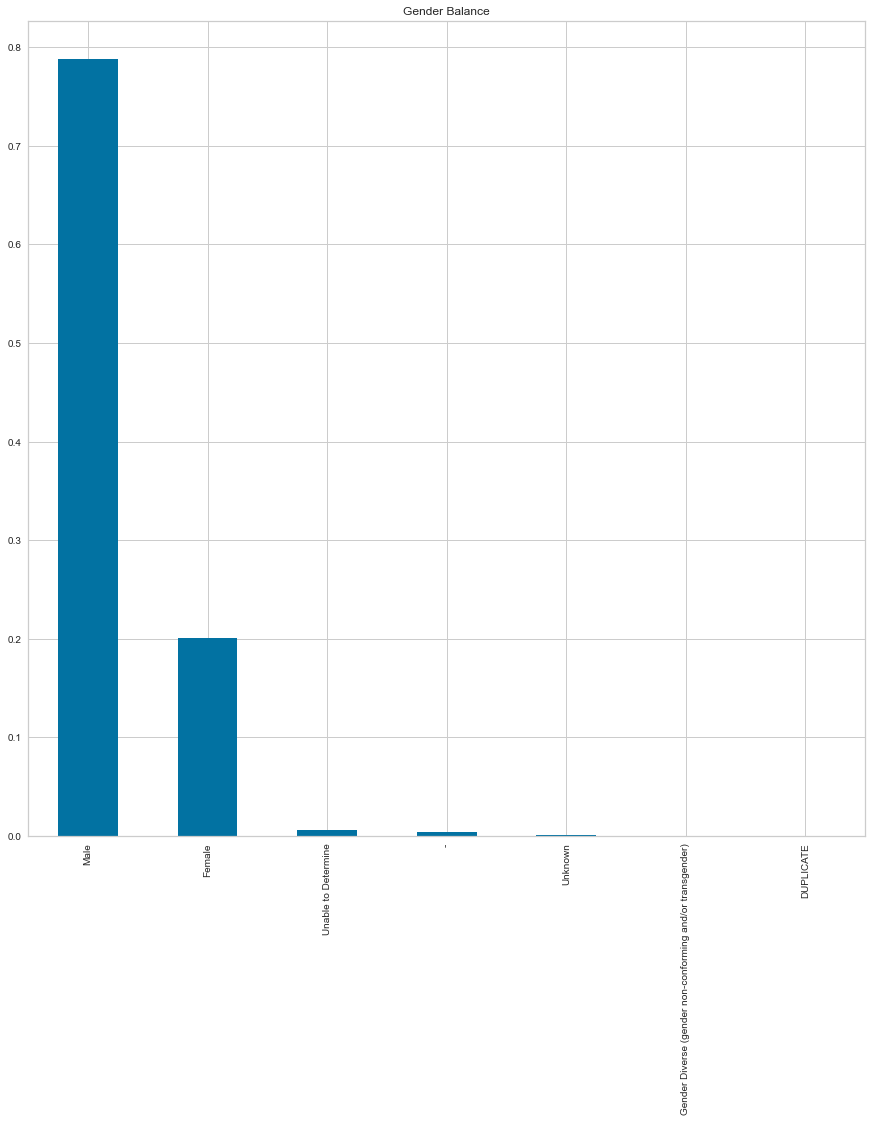

In [6]:
#seeing What gender gets pulled over the most 
plt.figure(figsize=(15,15))
terry['Subject Perceived Gender'].value_counts(normalize=True).plot.bar()
plt.title('Gender Balance')

<AxesSubplot:>

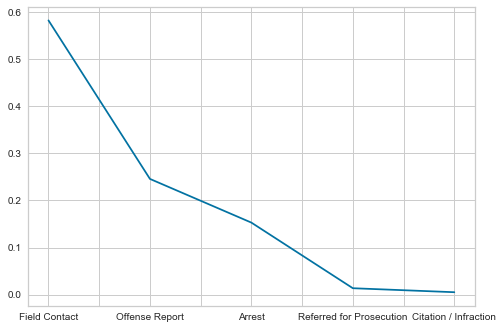

In [7]:
terry['Stop Resolution'].value_counts(normalize = True).plot()

In [8]:
 terry.groupby('Stop Resolution').count()

,Subject Age Group,Subject ID,GO / SC Num,Terry Stop ID,Weapon Type,Officer ID,Officer YOB,Officer Gender,Officer Race,Subject Perceived Race,...,Reported Date,Reported Time,Initial Call Type,Final Call Type,Call Type,Arrest Flag,Frisk Flag,Precinct,Sector,Beat
Stop Resolution,,,,,,,,,,,,,,,,,,,,,
Arrest,8210,8210,8210,8210,8210,8210,8210,8210,8210,8210,...,8210,8210,8210,8210,8210,8210,8210,8210,8210,8210
Citation / Infraction,271,271,271,271,271,271,271,271,271,271,...,271,271,271,271,271,271,271,271,271,271
Field Contact,31279,31279,31279,31279,31279,31279,31279,31279,31279,31279,...,31279,31279,31279,31279,31279,31279,31279,31279,31279,31279
Offense Report,13197,13197,13197,13197,13197,13197,13197,13197,13197,13197,...,13197,13197,13197,13197,13197,13197,13197,13197,13197,13197
Referred for Prosecution,726,726,726,726,726,726,726,726,726,726,...,726,726,726,726,726,726,726,726,726,726


In [9]:
#This tells me the amount of stop resolutions per age group

stop_count_per_age_group = terry.groupby(['Subject Age Group', 'Stop Resolution'])['Stop Resolution'].count()
stop_count_per_age_group

Subject Age Group  Stop Resolution         
-                  Arrest                        182
                   Citation / Infraction           5
                   Field Contact                1086
                   Offense Report                544
                   Referred for Prosecution        9
1 - 17             Arrest                        359
                   Citation / Infraction           5
                   Field Contact                 820
                   Offense Report                841
                   Referred for Prosecution       55
18 - 25            Arrest                       1765
                   Citation / Infraction          68
                   Field Contact                5592
                   Offense Report               2910
                   Referred for Prosecution      181
26 - 35            Arrest                       2937
                   Citation / Infraction          70
                   Field Contact               10436
  

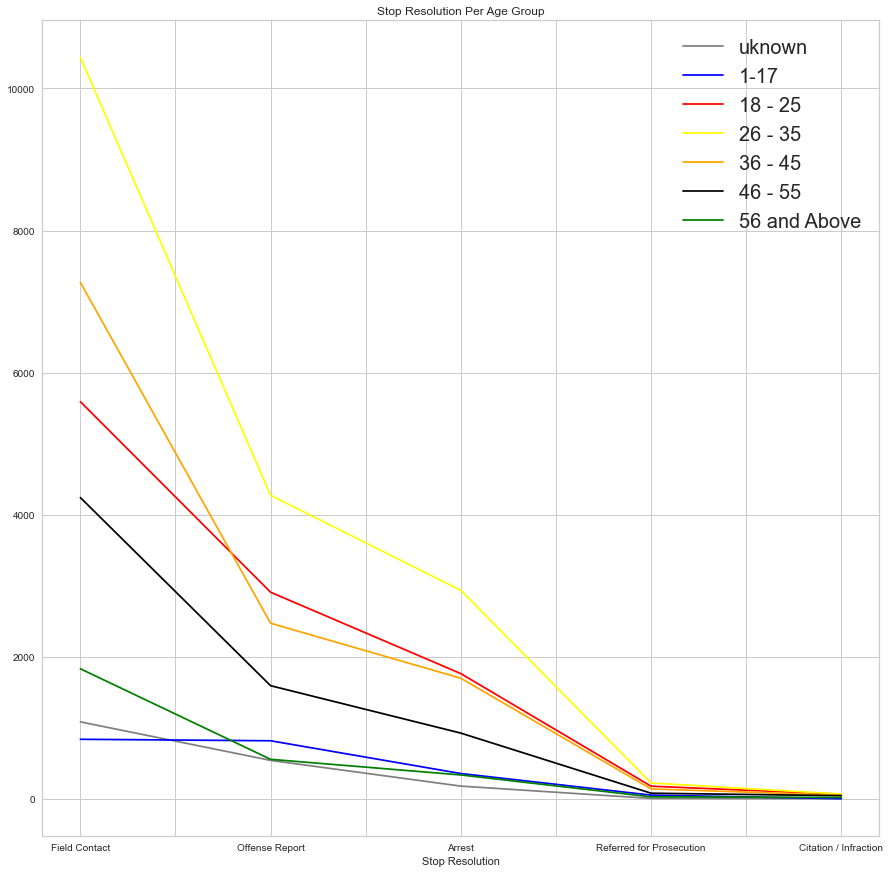

In [10]:
#Want to see the stop resolutions per age group. We want to see the trend.

plt.figure(figsize=(15,15))
plt.title('Stop Resolution Per Age Group')
stop_count_per_age_group['-'].sort_values(ascending= False).plot(color = 'grey', label='uknown')
stop_count_per_age_group['1 - 17'].sort_values(ascending = False).plot(color = 'blue', label = '1-17')
stop_count_per_age_group['18 - 25'].sort_values(ascending = False).plot(color= 'red', label = '18 - 25')
stop_count_per_age_group['26 - 35'].sort_values(ascending = False).plot(color = 'yellow', label = '26 - 35')
stop_count_per_age_group['36 - 45'].sort_values(ascending = False).plot(color = 'orange', label = '36 - 45')
stop_count_per_age_group['46 - 55'].sort_values(ascending = False).plot(color = 'black', label = '46 - 55')
stop_count_per_age_group['56 and Above'].sort_values(ascending = False).plot(color = 'green', label = '56 and Above')
plt.legend(loc=1, prop={'size': 20})

<AxesSubplot:>

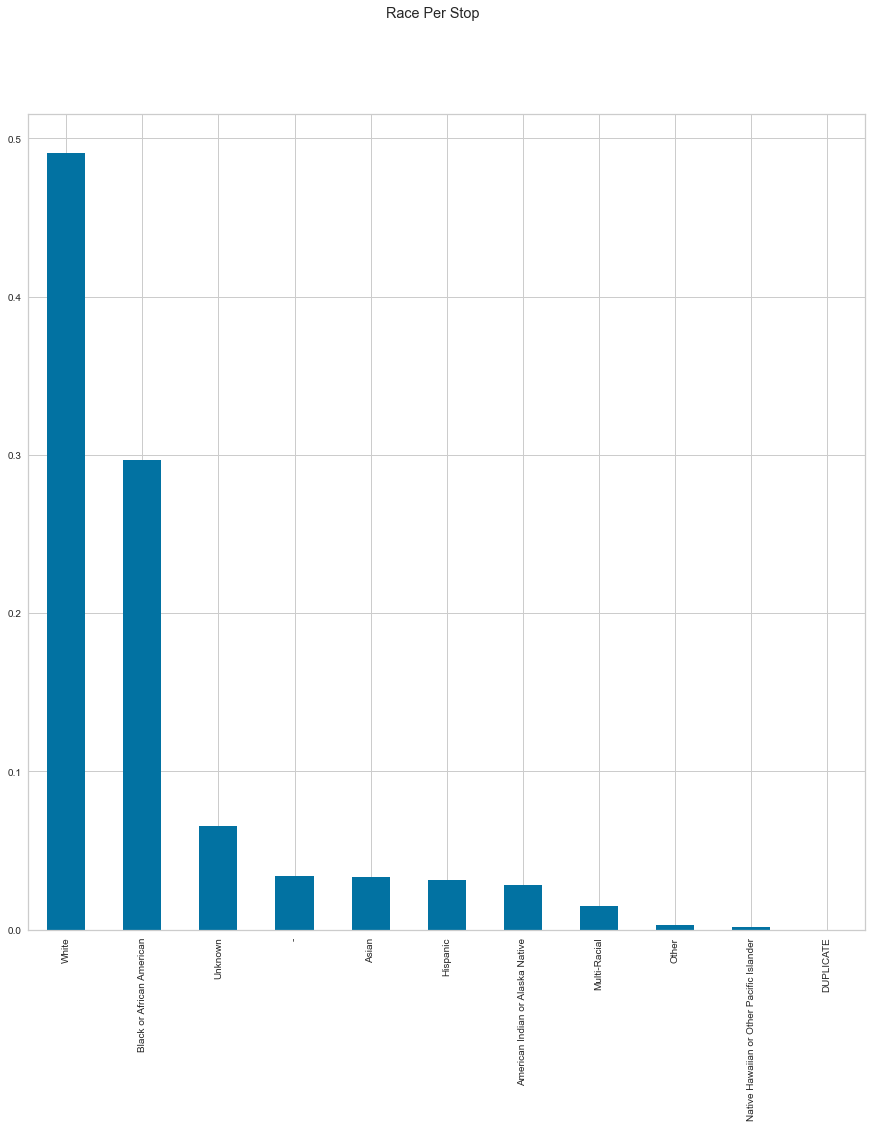

In [11]:
#The Precieved Race what is the percentage
plt.figure(figsize=(15,15))
plt.suptitle('Race Per Stop')
terry['Subject Perceived Race'].value_counts(normalize = True).plot.bar()

In [12]:
Officer_Flag = terry.groupby(['Officer ID', 'Stop Resolution'])['Stop Resolution'].count()

<AxesSubplot:title={'center':'What happens when you are stopped'}>

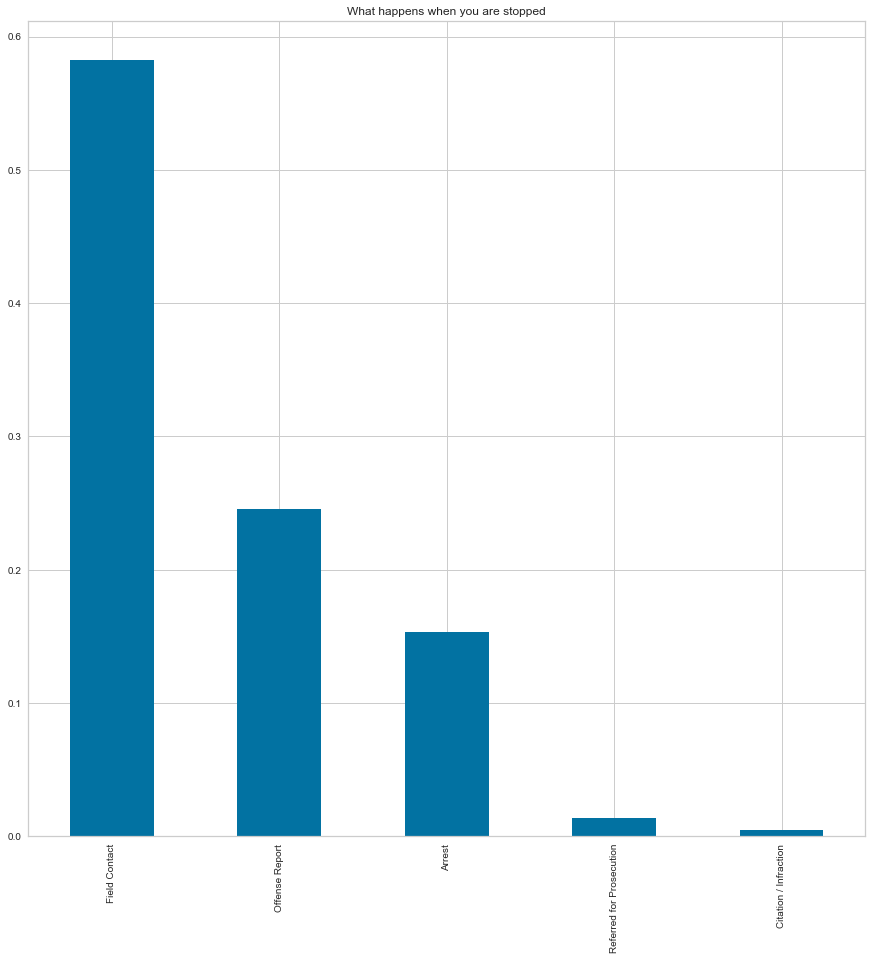

In [13]:
plt.figure(figsize=(15,15))
plt.title('What happens when you are stopped')
terry['Stop Resolution'].value_counts(normalize = True).plot.bar()

In [14]:
officers_who_arrest = (terry['Officer ID'].where(terry['Stop Resolution'] == 'Arrest')).value_counts()

<AxesSubplot:>

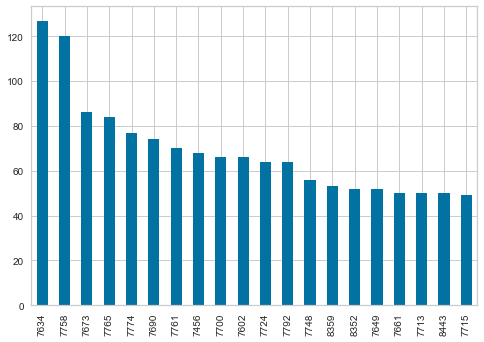

In [15]:
officers_who_arrest.head(20).plot.bar()

## Feature Engineering

In [16]:
#The arrests need to be in numerical format for binary classification so I will be Mapping it.and adding a new column 
arrest_map = {'Citation / Infraction''Field Contact''Offense Report''Offense Report''Referred for Prosecution': 0, 'Arrest': 1 }

In [17]:
terry['Arrest'] = terry['Stop Resolution'].map(arrest_map)

In [18]:
terry['Arrest'].fillna(0, inplace = True)
terry['Arrest'].astype(int)

0        0
1        0
2        1
3        0
4        0
        ..
53678    0
53679    0
53680    0
53681    0
53682    0
Name: Arrest, Length: 53683, dtype: int32

In [19]:
terry['Officer ID'].replace(to_replace = '-', value = 0, inplace = True)
terry.drop(terry[terry['Officer ID'] == 'IV70'].index, inplace = True)
terry.drop(terry[terry['Officer ID'] == 'CD911'].index, inplace = True)

In [20]:
terry['Officer ID'] = terry['Officer ID'].astype('int64')                                     

In [21]:
# delete all rows with column 'Age' has value 30 to 40
terry.corr()

,Subject ID,GO / SC Num,Terry Stop ID,Officer ID,Officer YOB,Arrest
Subject ID,1.000000,0.161238,0.786887,0.284673,0.208862,-0.243994
GO / SC Num,0.161238,1.000000,0.192033,0.101931,0.071668,-0.052190
Terry Stop ID,0.786887,0.192033,1.000000,0.338936,0.250995,-0.272344
Officer ID,0.284673,0.101931,0.338936,1.000000,0.772158,-0.064134
Officer YOB,0.208862,0.071668,0.250995,0.772158,1.000000,-0.015695
Arrest,-0.243994,-0.052190,-0.272344,-0.064134,-0.015695,1.000000


In [22]:
terry['Subject Age Group'].replace(to_replace = '-', value = 'Unknown', inplace = True)

In [23]:
age_map = {'56 and Above': 7, '46 - 55': 6, '36 - 45': 5, '26 - 35': 4, '18 - 25': 3, '1 - 17': 2, 'Unknown': 1}
terry['Subject Age Group']= terry['Subject Age Group'].map(age_map)

In [24]:
terry['Subject Age Group'].value_counts()

4    17940
5    11639
3    10515
6     6894
7     2784
2     2080
1     1826
Name: Subject Age Group, dtype: int64

In [25]:
terry.corr()

,Subject Age Group,Subject ID,GO / SC Num,Terry Stop ID,Officer ID,Officer YOB,Arrest
Subject Age Group,1.000000,0.027895,0.017152,0.053960,0.052215,0.041445,-0.020894
Subject ID,0.027895,1.000000,0.161238,0.786887,0.284673,0.208862,-0.243994
GO / SC Num,0.017152,0.161238,1.000000,0.192033,0.101931,0.071668,-0.052190
Terry Stop ID,0.053960,0.786887,0.192033,1.000000,0.338936,0.250995,-0.272344
Officer ID,0.052215,0.284673,0.101931,0.338936,1.000000,0.772158,-0.064134
Officer YOB,0.041445,0.208862,0.071668,0.250995,0.772158,1.000000,-0.015695
Arrest,-0.020894,-0.243994,-0.052190,-0.272344,-0.064134,-0.015695,1.000000


In [26]:
terry['Subject Perceived Race'].replace(to_replace = '-', value = 'Not_listed', inplace = True)
terry['Subject Perceived Race'].replace(to_replace = 'Other', value = 'Not_listed', inplace = True)

terry['Subject Perceived Race'].value_counts()
terry.drop(terry[terry['Subject Perceived Race'] == 'DUPLICATE'].index, inplace = True)
terry.drop(terry[terry['Subject Perceived Race'] == 'Unknown'].index, inplace = True)

In [27]:
terry['Subject Perceived Race'].value_counts(normalize = True)

White                                        0.525076
Black or African American                    0.317985
Not_listed                                   0.039085
Asian                                        0.035954
Hispanic                                     0.033581
American Indian or Alaska Native             0.030211
Multi-Racial                                 0.016133
Native Hawaiian or Other Pacific Islander    0.001974
Name: Subject Perceived Race, dtype: float64

In [28]:
race_map = {'White': 1, 'Black or African American': 0,'Not_listed' : 2, 'Asian': 2, 'Hispanic': 2,'American Indian or Alaska Native': 2, 'Multi-Racial': 2, 'Native Hawiian or Other Pacific Islander' : 2}
terry['Race']= terry['Subject Perceived Race'].map(race_map)

In [29]:
#Column in Which We Dropped Everthing they do not help us answer the question

terry.drop(columns = ['Subject ID', 'Stop Resolution','GO / SC Num','Terry Stop ID','Officer YOB','Reported Date','Sector', 'Weapon Type','Officer Race','Officer Gender','Subject Perceived Race','Final Call Type','Call Type','Reported Time','Arrest Flag','Initial Call Type', 'Precinct','Frisk Flag','Sector','Beat','Subject Perceived Gender'], inplace = True)
terry.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 50147 entries, 2 to 53682
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Subject Age Group  50147 non-null  int64  
 1   Officer ID         50147 non-null  int64  
 2   Arrest             50147 non-null  float64
 3   Race               50048 non-null  float64
dtypes: float64(2), int64(2)
memory usage: 1.9 MB


In [30]:
terry.dropna(inplace = True)

In [31]:
terry['Arrest'] = terry['Arrest'].astype('int64')

In [32]:
terry['Race'] = terry['Race'].astype('int64')

In [33]:
terry

,Subject Age Group,Officer ID,Arrest,Race
2,1,7500,1,2
3,1,5670,0,2
4,1,4844,0,1
5,1,7539,0,2
6,1,6973,0,0
...,...,...,...,...
53678,7,8889,0,0
53679,7,8857,0,0
53680,7,6805,0,2
53681,7,7773,0,1



## Column Stop Resolution 

##### Focusing First on The results of the stop we want to get dummy for the stops to put them in there own columns. This way despite the presence of a weapon we can see how the stop was handled 



In [34]:
terry.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 50048 entries, 2 to 53682
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype
---  ------             --------------  -----
 0   Subject Age Group  50048 non-null  int64
 1   Officer ID         50048 non-null  int64
 2   Arrest             50048 non-null  int64
 3   Race               50048 non-null  int64
dtypes: int64(4)
memory usage: 1.9 MB


## Column Reported Date 

#### This column is a date and I just want to know if something was reported on that date so I can see if there is a correlation between months and weapons being present on the subject. 

C:\Users\metropolitanparkapts\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


[Text(0.5, 1.0, 'Arress Over Past Year')]

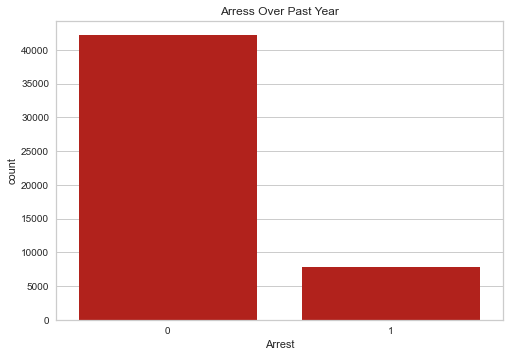

In [35]:
sns.countplot(terry['Arrest'], color = 'r').set(title = 'Arress Over Past Year')

## Modeling 

#### Beginning Our modeling buy Identifying the target. 

In [36]:
logreg = LogisticRegression()
dtc = DecisionTreeClassifier()
rfc = RandomForestClassifier()
knc = KNeighborsClassifier()


In [37]:
X = terry.drop(['Arrest'], axis = 1)
y = terry['Arrest']

Noticed the Dash as an age group replaced it with the MODE of the column to better help our model. As this column is also an object I will be mapping each range of ages to a number. 

In [38]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20)

## Baseline Model Logistic Regresssion

In [64]:
logreg.fit(X_train, y_train)
kfold_validation=KFold(10)
results = cross_val_score(logreg,X,y, cv=kfold_validation)
results.mean()

0.8427323635597016

In [40]:
logreg.fit(X_train, y_train)
logreg.score(X_train, y_train),model.score(X_test, y_test)

(0.8420000999050902, 0.8456543456543456)

In [63]:
cv_scores = cross_val_score(logreg, X_train, y_train, cv=3)
cv_scores

array([0.84205005, 0.84197512, 0.84197512])

C:\Users\metropolitanparkapts\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


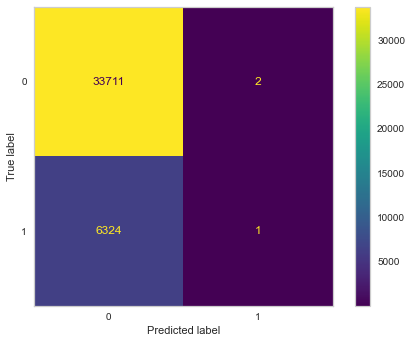

In [42]:
plot_confusion_matrix(model, X_train, y_train);
plt.grid(False)

## Random Forrest Classifier 

In [43]:
rfc.fit(X_train, y_train)

kfold_validation=KFold(10)
results = cross_val_score(rfc,X,y, cv=kfold_validation)
results.mean()

0.7957172763287871

In [57]:
cv_scores = cross_val_score(rfc, X_train, y_train, cv=3)
cv_scores

array([0.81005545, 0.80391128, 0.80353664])

C:\Users\metropolitanparkapts\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


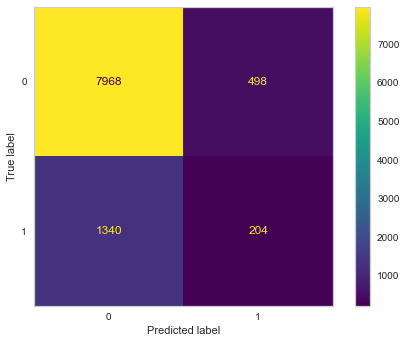

In [44]:
plot_confusion_matrix(rfc, X_test, y_test);
plt.grid(False)

## Decisiion Tree Classifier

In [45]:
dtc.fit(X_train, y_train)

kfold_validation=KFold(10)
results = cross_val_score(dtc,X,y, cv=kfold_validation)
results.mean()

0.8037896476025972

In [58]:
cv_scores = cross_val_score(dtc, X_train, y_train, cv=3)
cv_scores

array([0.81515061, 0.81185374, 0.81297767])

C:\Users\metropolitanparkapts\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


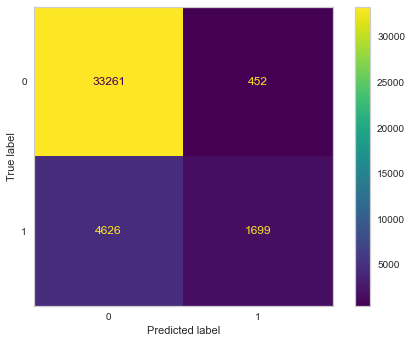

In [46]:
plot_confusion_matrix(dtc, X_train, y_train);
plt.grid(False)

## Kneighbors Classification Model

In [47]:
knc.fit(X_train, y_train)

kfold_validation=KFold(10)
results = cross_val_score(knc,X,y, cv=kfold_validation)
results.mean()

0.8079058830857392

In [59]:
cv_scores = cross_val_score(knc, X_train, y_train, cv=3)
cv_scores

array([0.81972126, 0.81754833, 0.8179979 ])

C:\Users\metropolitanparkapts\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


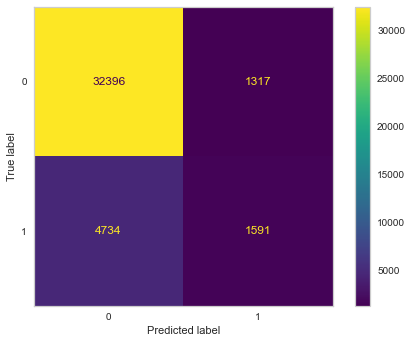

In [49]:
plot_confusion_matrix(knc, X_train, y_train);
plt.grid(False)

## Model Improvements
    - Typically during this section I focus on feature selection. However due to the fact that that my features are only a few I will avoid this. This can be improved upon in the future 
    -I will due model improvements directly to the model parameter and keep the features in the same way

In [50]:
logistic_regression_params={'solver': ['liblinear'], 'max_iter':[40]} 
decision_tree_params={'splitter': ['best']}
random_forrest_params={'n_estimators': [50, 100, 150, 200],'max_depth': [2, 5, 10, None]}
k_neighbors_params = {'n_neighbors':[3]}


###  Logistic Regression 2

In [51]:
log_grid=GridSearchCV(LogisticRegression(),logistic_regression_params, scoring="accuracy",cv=3,verbose=1)
log_grid.fit(X_train,y_train)
log_pred =log_grid.predict(X)
print(accuracy_score(y,log_pred),recall_score(y,log_pred), precision_score(y,log_pred), f1_score(y,log_pred))

Fitting 3 folds for each of 1 candidates, totalling 3 fits
0.8427309782608695 0.00012708095056551024 0.25 0.00025403277022735933


In [62]:
cv_scores = cross_val_score(log_grid, X_train, y_train, cv=3)
cv_scores

Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits


array([0.84205005, 0.84197512, 0.84197512])

### Decision Tree 2

In [52]:
dt_grid=GridSearchCV(DecisionTreeClassifier(),decision_tree_params, scoring="accuracy",cv=3,verbose=1)
dt_grid.fit(X_train,y_train)
dt_pred =dt_grid.predict(X)
print(accuracy_score(y,dt_pred),recall_score(y,dt_pred), precision_score(y,dt_pred), f1_score(y,dt_pred))

Fitting 3 folds for each of 1 candidates, totalling 3 fits
0.8625719309462916 0.2371330537552421 0.6807734403502371 0.3517436380772856


In [65]:
cv_scores = cross_val_score(dt_grid, X_train, y_train, cv=3)
cv_scores

Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits


array([0.81560018, 0.81125431, 0.81230331])

### Random Forrest Classifier

In [67]:
rand_grid=GridSearchCV(RandomForestClassifier(),random_forrest_params, scoring="accuracy",cv=3,verbose=1)
rand_grid.fit(X_train,y_train)
rand_pred =rand_grid.predict(X)
print(accuracy_score(y,rand_pred),recall_score(y,rand_pred), precision_score(y,rand_pred), f1_score(y,rand_pred))

Fitting 3 folds for each of 16 candidates, totalling 48 fits
0.8427709398976982 0.0 0.0 0.0


C:\Users\metropolitanparkapts\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [61]:
cv_scores = cross_val_score(rand_grid, X_train, y_train, cv=3)
cv_scores

Fitting 3 folds for each of 16 candidates, totalling 48 fits
Fitting 3 folds for each of 16 candidates, totalling 48 fits
Fitting 3 folds for each of 16 candidates, totalling 48 fits


array([0.84205005, 0.84205005, 0.84197512])

### K-N-N

In [54]:
kn_grid=GridSearchCV(KNeighborsClassifier(),k_neighbors_params, scoring="accuracy",cv=3,verbose=1)
kn_grid.fit(X_train,y_train)
kn_pred =kn_grid.predict(X)
print(accuracy_score(y,kn_pred),recall_score(y,kn_pred), precision_score(y,kn_pred), f1_score(y,kn_pred))

Fitting 3 folds for each of 1 candidates, totalling 3 fits
0.83755594629156 0.2982589909772525 0.4736629667003027 0.36603243917654393


In [60]:
cv_scores = cross_val_score(kn_grid, X_train, y_train, cv=3)
cv_scores

Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits


array([0.80181328, 0.80211299, 0.80023977])

### Conclusion
The Decision Tree was the most accurate thing when it comes to modeling the accuracy demonstrated by the decision tree model reached 86 percent which while being the most accurate more than likely implies overfitting. 

#### Improvements 
We can improve upon the modeling if we find higher correlating features or utilize the features that were provided such as weapons or precinct to better determine whether or not those type of things have a direct impact on arrest. 

We could also add some kind of weight to things like different races or percieved races to say that races that have a lower percentage as far as population is concerned have a higher impact towards being arrested. 

#### Future Analysis
I would love to take the statics of time factor such as month and render the months as a feature to see if there is a greater correlation to the Chance of you getting arrested. 

Features utilized in the analysis

Race 
Officer ID
Subject Age Group

